In [1]:
# imports
from aerofoil2 import main_pontoon_calc
from aerofoil import calc_naca_area, defence_block
from mech_module import *
from power_calcs import *


In [2]:
# define river speed and power requirements (the RPM is calculated from the river velocity)
foil_width = 0.35
river_vel = 1
turbine_width = 1.2
turbine_diameter = 1.2
pontoon_length = 1.4
r_drum = 0.425/2

# define debris defence
block_t = 0.2
block_w = 0.2
block_spacing = 0.12
grid_offset = 0.3


num things: 2


/Users/philblecher/Desktop/Github/DP5-code/aerofoil2.py:290: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(integrand, 0.0, panel.length)[0]


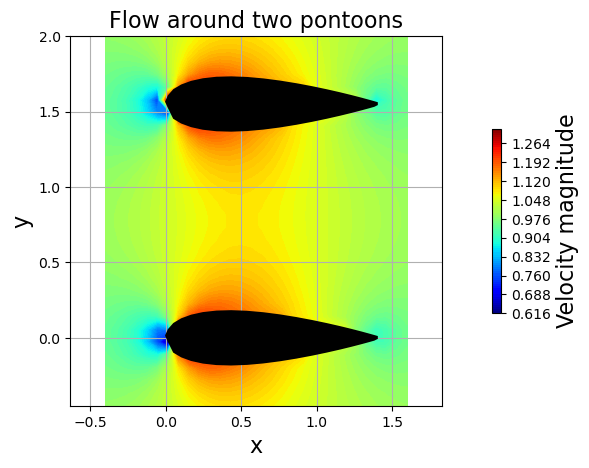

In [3]:
# apply effect of pontoons on river speed (calculate pontoon volume)
mean_pontoon_velocity = main_pontoon_calc(foil_width, turbine_width, pontoon_length,river_vel,grid=False, block_t = block_t, block_w=block_w, grid_offset=grid_offset, block_spacing=block_spacing, plot=True)
river_vel = mean_pontoon_velocity

In [4]:
# compare the effect of pontoon thickness and width on river speed
# lengths = np.linspace(0.5, 2.5, 5)
# widths = np.linspace(0.1, 0.6, 5)
# river_vels = []
# for l in lengths:
#     for w in widths:
#         river_vels.append(main_pontoon_calc(w, turbine_width, l, river_vel,grid=False, block_t = block_t, block_w=block_w, grid_offset=grid_offset, block_spacing=block_spacing, plot=False))

num things: 2
num things: 2


/Users/philblecher/Desktop/Github/DP5-code/aerofoil2.py:286: RuntimeWarning: invalid value encountered in double_scalars
  return (((x - (panel.xa - numpy.sin(panel.beta) * s)) * dxdk +


num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2
num things: 2


In [5]:
# plot results as a heatmap with 20 colours
# river_vels_plot = np.array(river_vels).reshape(5,5)
# fig, ax = plt.subplots()
# cax = ax.matshow(river_vels_plot, cmap='viridis')
# fig.colorbar(cax)
# ax.set_xticklabels(['']+list(np.round(widths,2)))
# ax.set_yticklabels(['']+list(np.round(lengths,2)))
# ax.set_xlabel('Pontoons width (m)')
# ax.set_ylabel('Pontoons length (m)')
# ax.set_title('River speed with different AR pontoons')
# plt.show()

In [6]:
# Prototype calculations - ignore
length = 0.36
pontoon_area = calc_naca_area(length/4,length)
print('Pontoons area = ', pontoon_area, 'm^2')
max_depth = 0.1
allowed_depth = max_depth - 0.045
prototype_mass = 1.1
pontoon_volume = prototype_mass / 1000
area = pontoon_volume / allowed_depth
print('Calcd Pontoons area = ', area, 'm^2')

print('Pontoon height = ', max_depth, 'm')
print('Pontoon width = ', length/4, 'm')
print('Pontoon length = ', length, 'm')



Pontoons area =  0.022176101403387563 m^2
Calcd Pontoons area =  0.019999999999999997 m^2
Pontoon height =  0.1 m
Pontoon width =  0.09 m
Pontoon length =  0.36 m


In [7]:
# calculate the area of the turbine
pontoon_area = calc_naca_area(foil_width, pontoon_length)

In [8]:
print('Pontoon area: ', pontoon_area)
print('Mean pontoon velocity: ', mean_pontoon_velocity)

Pontoon area:  0.33537931134752796
Mean pontoon velocity:  1.110060177158089


In [9]:
# how tall do the pontoons need to be to support the turbine?
turbine_mass = 100
pontoon_height = pontoon_height_calc(pontoon_area, turbine_mass)
print('Pontoon height: ', pontoon_height)

Pontoon height:  0.14908492655406766


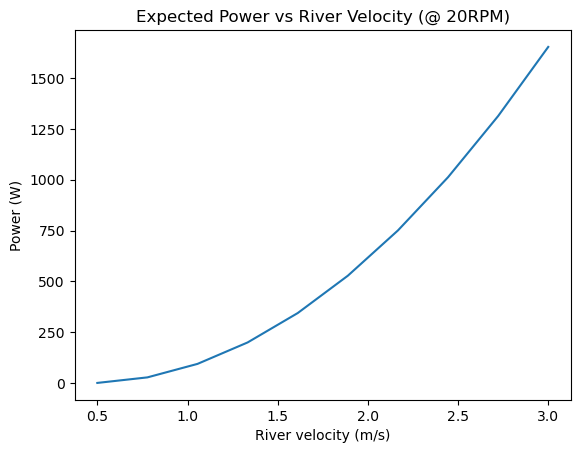

In [10]:
# calculate RPM (using the velocity model for shaft power output)
v = np.linspace(0.5,3,10)
p_array = power(v, runner_diameter=turbine_diameter, r_drum=r_drum, L=turbine_width/2, RPM=20)

max_power_array = []
# compare to the power of that flow to get the efficiency
blade_area = ((turbine_diameter/2) - r_drum) * turbine_width
for i in range(len(v)):
    p, _,_,_,_ = power_calc(efficiency=1,V=v[i],A=blade_area)
    max_power_array.append(p)

# overall efficiency
eff = p_array/max_power_array
efficiency = max(eff)

# plot power vs velocity 
plt.plot(v,p_array)
plt.xlabel('River velocity (m/s)')
plt.ylabel('Power (W)')
plt.title('Expected Power vs River Velocity (@ 20RPM)')
plt.show()


# # plot power vs velocity and efficiency vs velocity on the same plot
# fig, ax1 = plt.subplots()
# ax1.plot(v,p_array, label='Power')
# ax1.set_xlabel('River velocity (m/s)')
# ax1.set_ylabel('Power (W)', color='b')
# ax1.tick_params('y', colors='b')
# ax1.set_title('Power and Efficiency vs River Velocity')
# ax1.legend(loc='upper left')

# ax2 = ax1.twinx()
# ax2.plot(v,eff, label='Efficiency', color='r')
# ax2.set_ylabel('Efficiency', color='r')
# ax2.tick_params('y', colors='r')
# ax2.legend(loc='upper right')

# fig.tight_layout()
# plt.show()





In [11]:
# with the RPM, power requirements, river velocity, and efficiency estimates for components
# calculate base dimensions for the turbine (width and radius of the turbine) (calculate rough volume of the turbine)

# set RPM to the max power RPM
RPM = 20

# estimate the efficiency of the turbine
generator_eff = 0.9
gearbox_eff = 0.95
drive_efficiency = generator_eff * gearbox_eff
print('Drive efficiency: ', drive_efficiency)

# hydro efficiency is calculated above as 0.12

# power required = 400w
power_required = 300
efficiency = efficiency * drive_efficiency
print('Overall Efficiency: ', efficiency)

# calculate the area required for the turbine
_, _, _, area, _ = power_calc(efficiency=efficiency,V=river_vel,P=power_required)
print('Area required (m^2): ', area)


Drive efficiency:  0.855
Overall Efficiency:  0.15498017004714387
Area required (m^2):  1.415160027823911


In [12]:
# using the above calculate the required blade thickness (with additional input of material properties)
# define the material properties
sigma_y = 23.5e6
worst_case_vel = 3
sf = 1.5
thickness = minimum_blade_thickness(sigma_y, worst_case_vel*sf, turbine_width/2, r_drum, rho=1000, RPM=RPM,CD = 1.28)
print('Blade thickness (mm): ', thickness)

Blade thickness (mm):  8.977943176322665


In [13]:
# run the debris impact model to determine worst case debris size and impact force
# define the material properties
impact_toughness = 2.6 # J/cm^2
size = debris_calc(impact_toughness, thickness, worst_case_vel)
print('Debris length size (mm): ', size)


Debris length size (mm):  347.6489338037143


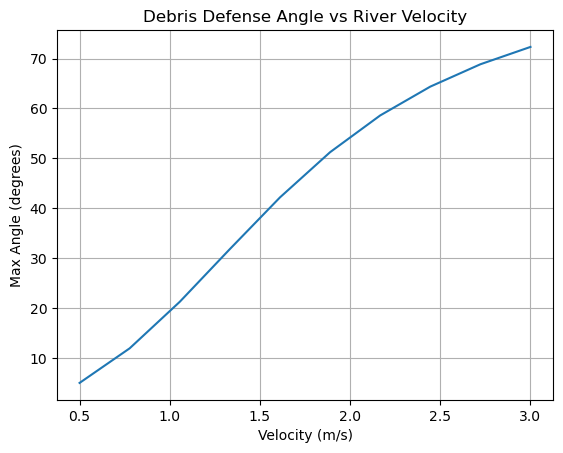

In [14]:
# calculate the angle of the debris defense system to send debris under the turbine
angles = []
velocities = np.linspace(0.5, 3,10 )
for u in velocities:
    angles.append(-debris_angle(u, size/1000 ))

# plot the angle vs velocity
plt.plot(velocities, angles)
plt.grid()
plt.xlabel('Velocity (m/s)')
plt.ylabel('Max Angle (degrees)')
plt.title('Debris Defense Angle vs River Velocity')
plt.show()


In [15]:
# using dimensions and inputs calculate the torque on the drive shaft

# calculate the torque on the drive shaft
torque_val = torque(worst_case_vel,turbine_diameter,r_drum, turbine_width/2,RPM)
print('Worst case torque (Nm): ', torque_val)

Worst case torque (Nm):  789.2017979492964
